<a href="https://colab.research.google.com/github/dehpour/Reactor-Antineutrino-Flux-Analysis/blob/main/ILL's%20Phenomenological%20Model%20Predicted%20Antineutrino%20Flux%20Compare%20with%20Recently%20Observations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sympy import diff,solve,Eq

<h2 style="background-color:green;">
U-235 Spectra
</h2>

Load predicted antineutrino spectra for U-235 according beta spectra from ILL paper [1] and fit on that with chi-squared method. Hence we have spectra function per energy.

In [3]:
ILL_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/1985Schreckenbach_N_nu_E_235U.csv')
E_ILL_235U, N_ILL_235U, err_ILL_235U = ILL_235U['E'], ILL_235U['N_nu'], ILL_235U['err_tot']
#ILL_235U.head()

In [5]:
from sympy.abc import a,b,c,d,e,f
chi_sq = []

for i in range (len(N_ILL_235U)):
    chi_sq.append(((np.log(N_ILL_235U[i]) - (a + b*(E_ILL_235U[i]) + c*(E_ILL_235U[i])**2 + d*(E_ILL_235U[i])**3 + e*(E_ILL_235U[i])**4+f*(E_ILL_235U[i])**5))/np.log((err_ILL_235U[i]*N_ILL_235U[i])/100))**2)
    i += 1
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a), 0)
eq2 = Eq(diff(chi_sq,b), 0)
eq3 = Eq(diff(chi_sq,c), 0)
eq4 = Eq(diff(chi_sq,d), 0)
eq5 = Eq(diff(chi_sq,e), 0)
eq6 = Eq(diff(chi_sq,f), 0)
sol = solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))
a_0_235U, a_1_235U, a_2_235U, a_3_235U, a_4_235U,a_5_235U = np.float(sol[a]), np.float(sol[b]), np.float(sol[c]), np.float(sol[d]), np.float(sol[e]), np.float(sol[f])

Load Daya Bay (DYB) and PROSPECT experimental data from [2,3]. Note that spectra must per 12 hr per 1 MeV per fission (fission energy equal to 203 MeV), these data per 24 hr (because we want compare with ILL results), so we divide by 2.<br>
Another hand PROSPECT data per 200 keV and we must convert to per 1 MeV per fission.

In [58]:
DYB_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2019Adey_N_nu_E_235U.csv')
E_DYB_235U, N_DYB_235U = DYB_235U['E'], DYB_235U['N_nu']/2
#DYB_235U.head()

In [59]:
PROSPECT_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2018Ashenfelter_N_nu_E_235U.csv')
E_PROSPECT_235U, N_PROSPECT_235U = PROSPECT_235U['E'], ((202.36*1000)/200)*PROSPECT_235U['N_nu']*10**-6/2
#PROSPECT_235U.head()

In [49]:
NU4_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2021Serebrov_N_nu_E_235U.csv')
E_NU4_235U, N_NU4_235U = NU4_235U['E'], NU4_235U['N_nu']/2
#NU4_235U.head()

In [57]:
NEOS_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2020Oh_N_nu_E_235U.csv')
E_NEOS_235U, N_NEOS_235U = NEOS_235U['E'], NEOS_235U['N_nu']*0.0213649852/2
#NEOS_235U.head()

Now we compare!

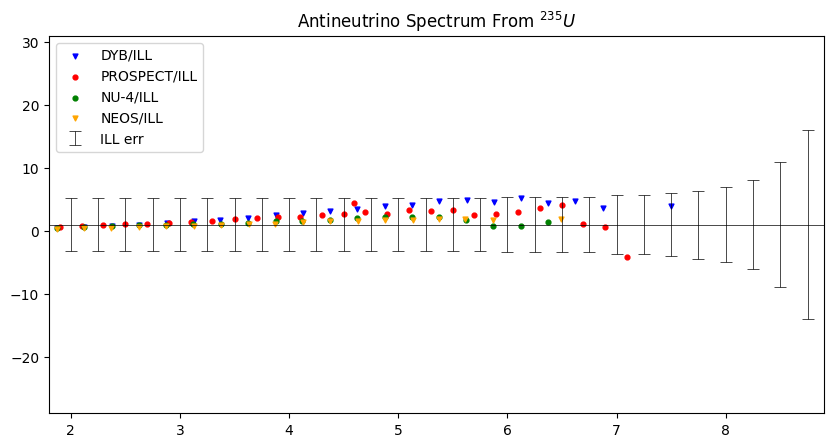

In [56]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(1.8,8.9)
#plt.ylim(1,10000000)
plt.ylim(1-30,1+30)
#plt.yscale("log") 

plt.scatter(E_DYB_235U, (N_DYB_235U)/np.exp(a_0_235U+a_1_235U*E_DYB_235U+a_2_235U*E_DYB_235U**2+a_3_235U*E_DYB_235U**3+a_4_235U*E_DYB_235U**4+a_5_235U*E_DYB_235U**5), label="DYB/ILL", c='b', marker='v', s=12)
plt.scatter(E_PROSPECT_235U, (N_PROSPECT_235U)/np.exp(a_0_235U+a_1_235U*E_PROSPECT_235U+a_2_235U*E_PROSPECT_235U**2+a_3_235U*E_PROSPECT_235U**3+a_4_235U*E_PROSPECT_235U**4+a_5_235U*E_PROSPECT_235U**5), label="PROSPECT/ILL", c='r', s=12)
plt.scatter(E_NU4_235U, (N_NU4_235U)/np.exp(a_0_235U+a_1_235U*E_NU4_235U+a_2_235U*E_NU4_235U**2+a_3_235U*E_NU4_235U**3+a_4_235U*E_NU4_235U**4+a_5_235U*E_NU4_235U**5), label="NU-4/ILL", c='green', marker='o', s=12)
plt.scatter(E_NEOS_235U, (N_NEOS_235U)/np.exp(a_0_235U+a_1_235U*E_NEOS_235U+a_2_235U*E_NEOS_235U**2+a_3_235U*E_NEOS_235U**3+a_4_235U*E_NEOS_235U**4+a_5_235U*E_NEOS_235U**5), label="NEOS/ILL", c='orange', marker='v', s=12)

plt.errorbar(E_ILL_235U, (N_ILL_235U/N_ILL_235U), yerr=(err_ILL_235U), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5, label="ILL err")
plt.axhline(y=1, color='black', linestyle='-',linewidth=0.5)

plt.title('Antineutrino Spectrum From ''$^{235}U $')
plt.legend()
plt.show()

<h2 style="background-color:green;">
Pu-239
</h2>

Load predicted antineutrino spectra for Pu-239 according beta spectra from ILL paper [4] and fit on that with chi-squared method. Hence we have spectra function per energy.

In [60]:
ILL_239Pu = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/1989Hahn_N_nu_E_239Pu.csv')
E_ILL_239Pu, N_ILL_239Pu, err_ILL_239Pu = ILL_239Pu['E'], ILL_239Pu['N_nu'], ILL_239Pu['err_tot']
#ILL_239Pu.head()

In [62]:
from sympy.abc import a,b,c,d,e,f
chi_sq = []

for i in range (len(N_ILL_239Pu)):
    chi_sq.append(((np.log(N_ILL_239Pu[i]) - (a + b*(E_ILL_239Pu[i]) + c*(E_ILL_239Pu[i])**2 + d*(E_ILL_239Pu[i])**3 + e*(E_ILL_239Pu[i])**4+f*(E_ILL_239Pu[i])**5))/np.log((err_ILL_239Pu[i]*N_ILL_239Pu[i])/100))**2)
    i += 1
    
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a), 0)
eq2 = Eq(diff(chi_sq,b), 0)
eq3 = Eq(diff(chi_sq,c), 0)
eq4 = Eq(diff(chi_sq,d), 0)
eq5 = Eq(diff(chi_sq,e), 0)
eq6 = Eq(diff(chi_sq,f), 0)
sol = solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))
a_0_239Pu, a_1_239Pu, a_2_239Pu, a_3_239Pu, a_4_239Pu,a_5_239Pu = np.float(sol[a]), np.float(sol[b]), np.float(sol[c]), np.float(sol[d]), np.float(sol[e]), np.float(sol[f])

Load Daya Bay (DYB) experimental data from [2]. Note that spectra must per 12 hr per 1 MeV per fission (fission energy equal to 203 MeV), these data per 24 hr (because we want compare with ILL results), so we divide by 2.<br>

In [72]:
DYB_239Pu = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2019Adey_N_nu_E_239Pu.csv')
E_DYB_239Pu, N_DYB_239Pu = DYB_239Pu['E'], DYB_239Pu['N_nu']/2
#DYB_239Pu.head()

In [73]:
NEOS_239Pu = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/2020Oh_N_nu_E_239Pu.csv')
E_NEOS_239Pu, N_NEOS_239Pu = NEOS_239Pu['E'], NEOS_239Pu['N_nu']*0.0251827782/2
#NEOS_235U.head()

Now we compare!

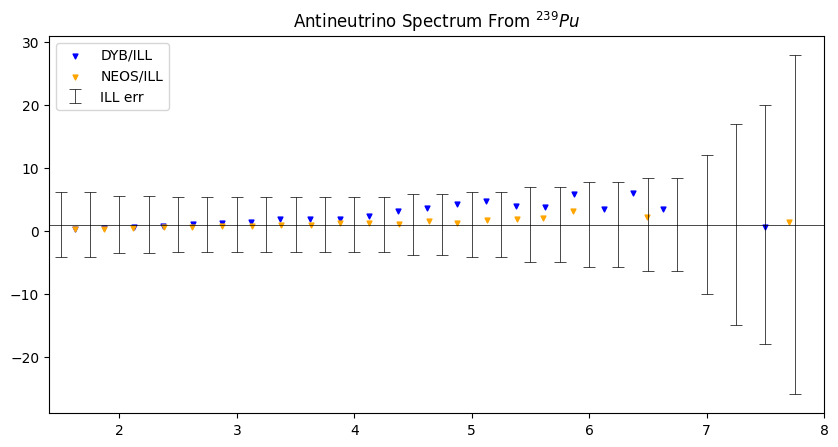

In [71]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(1.4,8)
plt.ylim(1-30,1+30)

plt.scatter(E_DYB_239Pu, (N_DYB_239Pu)/np.exp(a_0_239Pu+a_1_239Pu*E_DYB_239Pu+a_2_239Pu*E_DYB_239Pu**2+a_3_239Pu*E_DYB_239Pu**3+a_4_239Pu*E_DYB_239Pu**4+a_5_239Pu*E_DYB_239Pu**5), label="DYB/ILL", c='b', marker='v', s=12)
plt.scatter(E_NEOS_239Pu, (N_NEOS_239Pu)/np.exp(a_0_239Pu+a_1_239Pu*E_NEOS_239Pu+a_2_239Pu*E_NEOS_239Pu**2+a_3_239Pu*E_NEOS_239Pu**3+a_4_239Pu*E_NEOS_239Pu**4+a_5_239Pu*E_NEOS_239Pu**5), label="NEOS/ILL", c='orange', marker='v', s=12)

plt.errorbar(E_ILL_239Pu, (N_ILL_239Pu/N_ILL_239Pu), yerr=(err_ILL_239Pu), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5, label="ILL err")
plt.axhline(y=1, color='black', linestyle='-',linewidth=0.5)

plt.title('Antineutrino Spectrum From ''$^{239}Pu $')
plt.legend()
plt.show()

References: <br>
[1]
<a href="https://sci-hub.se/https://www.sciencedirect.com/science/article/abs/pii/0370269385913371"> Schreckenbach, K. et al. (1985). Determination of the antineutrino spectrum from 235-U thermal neutron fission products up to 9.5 MeV.</a><br>
[2]
<a href="https://sci-hub.se/https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.123.111801" target="_blank"> Adey, D., et al. (2019). Extraction of the 235-U and 239-Pu Antineutrino Spectra at Daya Bay.</a><br>
[3]
<a href="https://arxiv.org/pdf/1812.10877.pdf" target="_blank"> Ashenfelter, J., et al. (2018). Measurement of the Antineutrino Spectrum from 235-U Fission at HFIR with PROSPECT</a><br>
[4]
<a href="https://sci-hub.se/https://www.sciencedirect.com/science/article/abs/pii/0370269389915980"> Hahn, A. A., et al. (1989). Antineutrino spectra from 241-Pu and 239-Pu thermal neutron fission products.</a><br>
[5]
<a href="https://agenda.infn.it/event/24250/contributions/129838/attachments/79489/103375/Serebrov_neutrino-4_neutel2021.pdf">https://agenda.infn.it/event/24250/contributions/129838/attachments/79489/103375/Serebrov_neutrino-4_neutel2021.pdf</a><br>
[6]
<a href="https://iopscience.iop.org/article/10.1088/1742-6596/1468/1/012185">https://iopscience.iop.org/article/10.1088/1742-6596/1468/1/012185</a>